# What does the combined effects of property features, demographics composition, and economic indicators on the pricing dynamics of US Real Estate? 

## Introduction
Understanding the dynamics of housing prices in the real estate market is important for property owners, buyers, and investors. However, these prices are often unpredictable without thorough observation. Understanding the determinants of housing prices in the real world can provide valuable insights for stakeholders and facilitate their decision-making process.

An addition room in the house could possibly cost extra money for house owners. Oluseyi (2014) found that as the number of bathrooms and living rooms are crucial components affecting house prices. This is understanable becuase an extra room offers more convenience and comfort for residents, especially for bigger families. However, it's important to understand that property characteristics are not the solely factor to drive up the costs. Zietz et al. (2008) has constructed regression models to incorporate different variables including humans characteristics (eg. age, income) which also affect the housing purchases. 

The attributes of neighborhoods and local areas play a significant role in determining property value. Islam (2007) concluded that the presence of high-priced houses in an area can increase the house prices of those inhabited in that area. In addition, external factors such as crime rates and violence make a negative impact on prices, but their effect often gets negligible. 

Moreover, Ozmen et al. (2019) highlighted that housing prices not only correlate with the cost of living but also reflect he overall economic conditions across various states. Garlin (2008) noted a positive relationship between house prices and income, indicating that higher incomes boost confidence and drive up housing demand; thus making the prices go up. There is also a positive correlation between transport infrastructure and house prices (Churchill et al., 2021) in the long run, using non-linear and time-varying models.

All of these studies have indicated that housing prices are affected by a combination of various variables, and they are also interconnected. This paper will analyze the impact of the house features in conjunction with demographics and economic status across American states.

### Data Source
The dataset of housing prices was obtained from Kaggle, containing Real Estate listings in the US by State and zip code. It is collected from https://www.realtor.com/ - a real estate listing website operated by the News Corp subsidiary Move, Inc. and based in Santa Clara, California. The datase has 1 CSV file with 10 columns, each column represents a factor of the property.

## Data Preprocessing
- Construcing the Summary Statistics Table

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import warnings

# Suppress RuntimeWarnings from NumPy
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [4]:
dtype_zip_code = {'zip_code' : 'string'}
df = pd.read_csv('/Users/hanhhieudao/Desktop/ECO225/realtor-data.csv', dtype=dtype_zip_code)
df.head(3)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,00601,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,00601,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,00795,748.0,NaN,67000.0


In [5]:
df_zipcode = pd.read_csv('/Users/hanhhieudao/Desktop/ECO225/US-Zip-Codes-from-2013-Government-Data.csv', dtype=str)
df_map = df.merge(df_zipcode, left_on='zip_code', right_on='ZIP')
df_map = df_map.rename(columns={'LAT': 'Latitude', 'LNG': 'Longitude'})
df_map['Coordinates'] = list(zip(df_map.Longitude, df_map.Latitude))
df_map['Geometry'] = df_map["Coordinates"].apply(Point)
df_map.head(3)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,ZIP,Latitude,Longitude,Coordinates,Geometry
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,00601,920.0,NaN,105000.0,00601,18.180555,-66.749961,"(-66.749961, 18.180555)",POINT (-66.749961 18.180555)
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,00601,1527.0,NaN,80000.0,00601,18.180555,-66.749961,"(-66.749961, 18.180555)",POINT (-66.749961 18.180555)
2,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,00601,920.0,NaN,105000.0,00601,18.180555,-66.749961,"(-66.749961, 18.180555)",POINT (-66.749961 18.180555)


Some of the NA values were dropped since Matplotlib and Seaborn libraries in Python do not handle NA values well. Removing them from the data will better the visualization of the data without causing error in compiling codes.

In [6]:
# Checking for null/missing values 
df.isnull().sum()

status                 0
bed               143840
bath              123509
acre_lot          319197
city                  77
state                  0
zip_code             208
house_size        342084
prev_sold_date    517985
price                 72
dtype: int64

The dataset exhibites a signficant amount of missing values, specifically in columns: bed, bath, acre_lot, city, zip_code, house_size, prev_sold_date, and price. Those missing values might raise potential biases in decriptive stastitics and potential impact on our analytical insights. A summary statistics table will be useful to give an overview of the distribution of available values with their central tendency and spread.

In [7]:
summary = df[['bed', 'bath', 'acre_lot', 'price']].describe()
summary.columns = 'Bedrooms', 'Bathrooms', 'House Size (sqft)','Price (thousand USD)'

In [8]:
table = summary.style.format({
    'Bedrooms': '{:.1f}', 
    'Bathrooms': '{:.1f}',
    'House Size': '{:.1f}',
    'Price (thousand USD)': '${:,.0f}'
}).set_caption('Summary Statistics')
table

,Bedrooms,Bathrooms,House Size (sqft),Price (thousand USD)
count,904735.0,925066.0,729378.000000,"$1,048,503"
mean,3.3,2.5,15.593482,"$903,655"
std,2.1,2.0,910.810132,"$2,849,184"
min,1.0,1.0,0.000000,$0
25%,2.0,1.0,0.110000,"$275,000"
50%,3.0,2.0,0.280000,"$495,000"
75%,4.0,3.0,1.110000,"$850,000"
max,123.0,198.0,100000.000000,"$875,000,000"


The table provide some key insights of the dataset. In terms of number of bedrooms ('bed'), a diverse range is observed with average of 3 bedrooms with a standard deviation of 2, indicating variability around this mean. However, it has some outliers as the max number of bedroosm goes up to 123. Similarly, the bathroom counts have an avergae of 2 bathrooms per property, but there's also a property with 198 bathrooms, rasing some concerns about outliers. These findings underscore the necessity for meticulous outlier detection and critical assessment of the dataset's reliability in accurately representing properties across the state. In addition, outliers also indicate that larger property with high number of amentities are highly valuable in the market. Comparing to normal properties with average of 2-3 bathrooms and bedrooms, those large property demonstrate their uniqueness in the number of house rooms have extremely high values.

The distribution of living spaces might be right-screwked, with a tail extending towards larger sizes. This is due to the presence of outliers, and since 75% of the data is below 2500, it indicates that the majority of thoe houses have sizes on the lower end. The data implies that living space is a very important determinant to drive up the housing prices, rising up the property values significantly to millions of USA.

The average house price is $755,479 but the high standard deviation of $1,030,817 represents a wide range of prices of houses across the USA. This distribution suggests that there are various factors contribute to the price fluctuations. To address this spread, it's crucial to not only focus on housing properties, but also their other key factors such as neighborhood characteristics, socio-economic factors, and public amentities.


## Variables Selections
### Dependent variable (Y)
Housing price represents the monetary value of the property in the market. This is the target variable for pricing analysis of real estate across USA regarding to chosen indepedent variables. 

### Independent variable (X)
1. Number of bedrooms 'bed': The number of bedrooms represents the aspect of residential properties and influence a house's market values. Besides, it also provides insights into diversity of personal preferences and different need of house buyers. For instance, they can use extra rooms in the house for guest rooms, home offices, etc. that reflect a very distinct buyers segments within real estate market. 

2. Number of bathrooms 'bath': The number of bathrooms is a fundamental utility for homeowners and potential buyers. It contributes to the functional aspect of a property and also reflece the needs of inidviduals.

3. House size 'house_size': This matters because a bigger living space usually comes with more amentities and features, making the house more valuable. How the size of a house connected to its price is a significant factor. Understanding this relationship helps to know what people value in a home and how much they're willing to pay for it. 



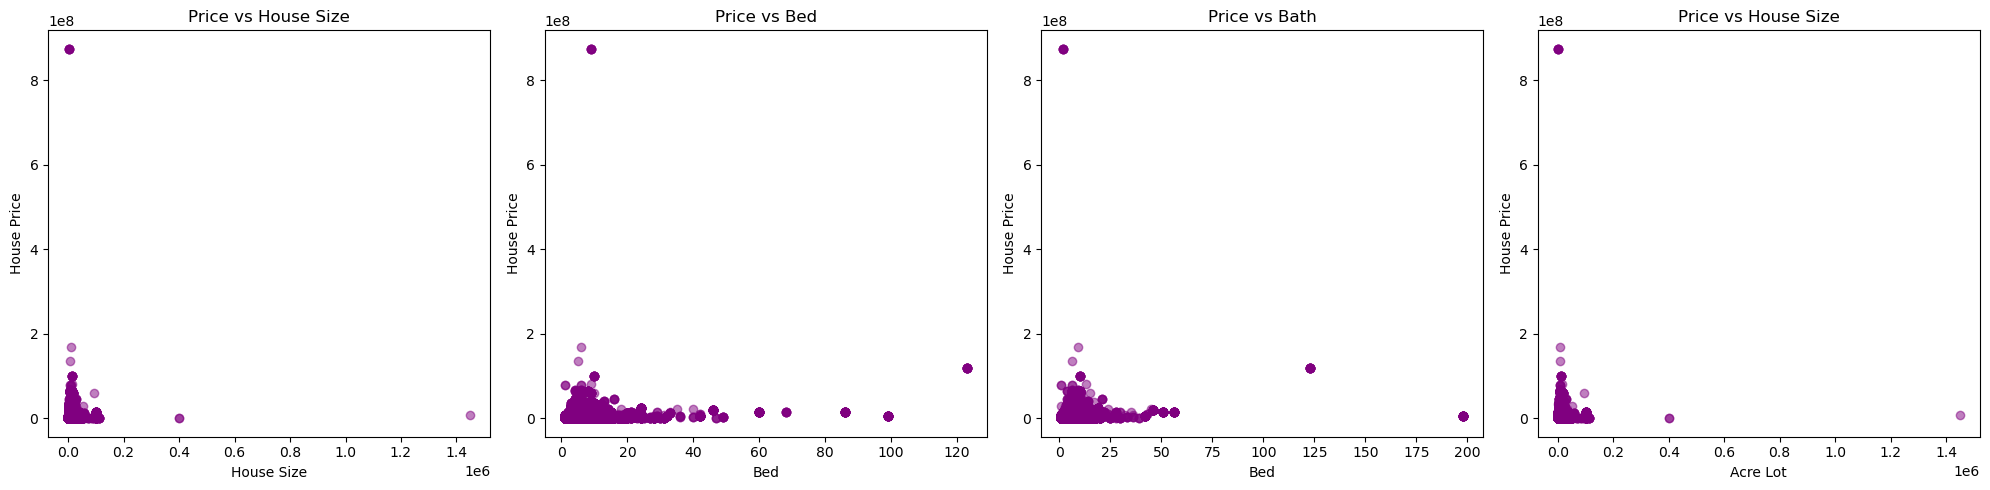

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Scatter plot for 'house_size'
axs[0].scatter(df['house_size'], df['price'], color="purple", alpha=0.5)
axs[0].set_xlabel("House Size")
axs[0].set_ylabel("House Price")
axs[0].set_title("Price vs House Size")

# Scatter plot for 'bed'
axs[1].scatter(df['bed'], df['price'], color="purple", alpha=0.5)
axs[1].set_xlabel("Bed")
axs[1].set_ylabel("House Price")
axs[1].set_title("Price vs Bed")

# Scatter plot for 'bath'
axs[2].scatter(df['bath'], df['price'], color="purple", alpha=0.5)
axs[2].set_xlabel("Bed")
axs[2].set_ylabel("House Price")
axs[2].set_title("Price vs Bath")

# Scatter plot for 'acre_lot'
axs[3].scatter(df['house_size'], df['price'], color="purple", alpha=0.5)
axs[3].set_xlabel("Acre Lot")
axs[3].set_ylabel("House Price")
axs[3].set_title("Price vs House Size")

fig.tight_layout()
plt.show()


The scatter plots reveal a stronger positive correlation between the number of bedrooms and bathrooms with housing price compared to the influence of house sizes. Tighter clustering and an upward trend indicate that higher bedroom and bathroom counrs for the highe values of properties, emphasizing their significant impact on real estate prices.

In [10]:
column_num = ['bed','bath','acre_lot','house_size','price']
Q1 = df[column_num].quantile(0.25)
Q3 = df[column_num].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[column_num] < (Q1 - 1.5 * IQR)) | (df[column_num] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
import plotly.express as px

df_mean = df.groupby('acre_lot')['price'].mean().reset_index()
fig = px.scatter(df_mean, x='acre_lot', y='price', trendline='ols')
fig.update_layout(title='Average Price per Acre Lot', xaxis_title='Acre Lot', yaxis_title='Price')
fig.show()

In [12]:
city_bed_count = df.groupby(['state', 'bath']).size().reset_index(name='count')
city_bed_count = city_bed_count.sort_values(by='count', ascending=False)
fig = px.bar(city_bed_count, x='state', y='count', color='bath', barmode='stack',
             title='Distribution of State with Bath',color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()


The distribution of bedroom and bathroom counts illustrates a clear concentration of properties with higher number in large states like New York and Massachusetts. This aligns with the presence of multiple metropolitan areas and cities, attracting a skilled labor force with increased housing demand, potentially contributing to elevated housing prices in these states. 

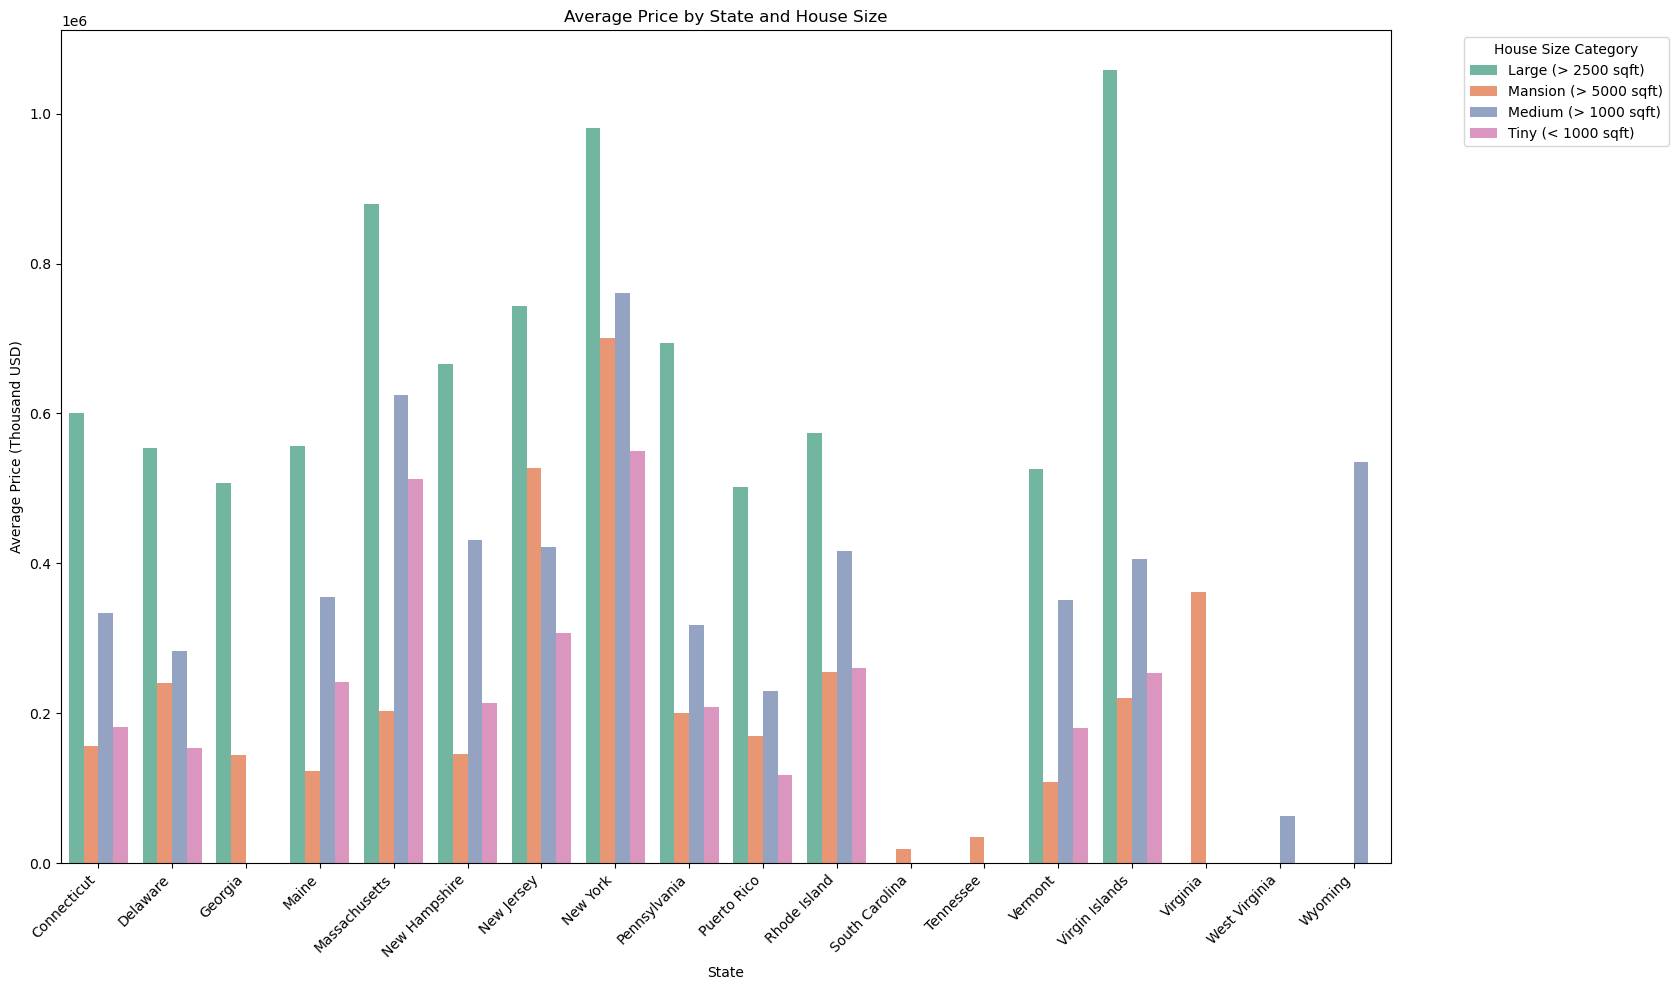

In [13]:
# Create a square_feet function to categorize houses based on their sizes
def square_feet(house_size):
    if house_size <= 1000:
        return 'Tiny (< 1000 sqft)'
    elif 1000 < house_size <= 2500:
        return 'Medium (> 1000 sqft)'
    elif 2500 < house_size <= 5000:
        return 'Large (> 2500 sqft)'
    else:
        return 'Mansion (> 5000 sqft)'

# Apply the square_feet function to create a new column 'house_size_category'
df['house_size_category'] = df['house_size'].apply(square_feet)

# Calculate the average price for each category of houses and group the data
grouped_house_sizes = df.groupby(['state', 'house_size_category'])['price'].mean().reset_index()

plt.figure(figsize=(20, 10))

# Plot the grouped bar chart with additional separation
sns.barplot(x='state', y='price', hue='house_size_category', data=grouped_house_sizes, palette="Set2", dodge=1)

plt.title('Average Price by State and House Size')
plt.xlabel('State')
plt.ylabel('Average Price (Thousand USD)')

plt.xticks(rotation=45, ha='right')
plt.legend(title='House Size Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()


From the chart, <span style="color:#00b377; font-weight:bold;">New York</span> and <span style="color:#00b377; font-weight:bold;">Massachusetts</span> stand out for recording high prices in the real estate market, particularly for large houses with sizes exceeding 2500 square feet. These states are home to major cities that serve as centers of economic activity and education. <span style="color:#00b377; font-weight:bold;">Virgin Island</span>, on the other hand, has a severely limited supply of housing with very high cost of living due to imported goods.

In [14]:
import matplotlib.pyplot as plt
from mpl_axes_aligner import align

top5=['Massachusetts', 'Wyoming', 'Georgia', 'New York', 'Virgin Islands']
filtered_data = df[df['state'].isin(top5)]

data_by_state = [filtered_data[filtered_data['state'] == state]['house_size'].values for state in top5]

# Select the top 5 states with the highest average prices
top_5_states = grouped_by_state.head(5)

# Extract relevant data for plotting
states = top_5_states['state_name']
bed_medians = top_5_states['bed_median']
bath_medians = top_5_states['bath_median']
house_size_medians = top_5_states['house_size_median']

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the bar chart for Bed Median and Bath Median
bar_width = 0.2
index = range(len(states))
bar2 = ax1.bar([i + bar_width for i in index], bed_medians, width=bar_width, label='Bed Median')
bar3 = ax1.bar([i + 2 * bar_width for i in index], bath_medians, width=bar_width, label='Bath Median')

# Set labels and title for the first y-axis
ax1.set_xlabel('States')
ax1.set_ylabel('Bed, Bath', color='blue')
ax1.set_title('Top 5 States with Highest Average Prices')
ax1.set_xticks([i + bar_width for i in index])
ax1.set_xticklabels(states)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')



NameError: name 'grouped_by_state' is not defined

## Mapping

To visualize the average housing prices across states on a map, it is essential to define the longitude and latitude coordinates. The geographic data utilized for this project is sourced from the US Census Bureau. 

First, the average and standard deviation of housing prices and arce_lot are calulated for each state. 

In [16]:
# Grouping the data by state and calculating the mean and standard deviation of price and acre_lot
grouped_by_state = df.groupby(['state']).agg(
    price_mean=('price', 'mean'),
    price_median=('price', 'median'),
    acre_lot_mean=('acre_lot', 'mean'),
    acre_lot_std=('price', 'std'),
    bed_median=('bed', 'median'), 
    bath_median=('bath', 'median'), 
    house_size_median=('house_size', 'median')
)
grouped_by_state['state_name'] = grouped_by_state.index
grouped_by_state = grouped_by_state.round(2)
# Presenting the result in descending order
grouped_by_state = grouped_by_state.sort_values(by='price_mean', ascending=False)
grouped_by_state['state_name'] = grouped_by_state.index
grouped_by_state.head()

,price_mean,price_median,acre_lot_mean,acre_lot_std,bed_median,bath_median,house_size_median,state_name
state,,,,,,,,
New York,698321.75,649000.0,0.29,391281.80,2.0,2.0,1164.0,New York
Massachusetts,604714.07,550000.0,0.51,360118.88,3.0,2.0,1568.0,Massachusetts
Wyoming,535000.00,535000.0,0.29,0.00,3.0,3.0,1935.0,Wyoming
New Jersey,495908.94,435000.0,0.31,295281.00,3.0,2.0,1572.0,New Jersey
Georgia,492703.60,490225.0,0.91,74803.07,5.0,3.5,3388.5,Georgia


Now, the map is generated. 

/var/folders/sc/hghgdjk51pbdrq1vbp6569q00000gn/T/ipykernel_17477/2619246026.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



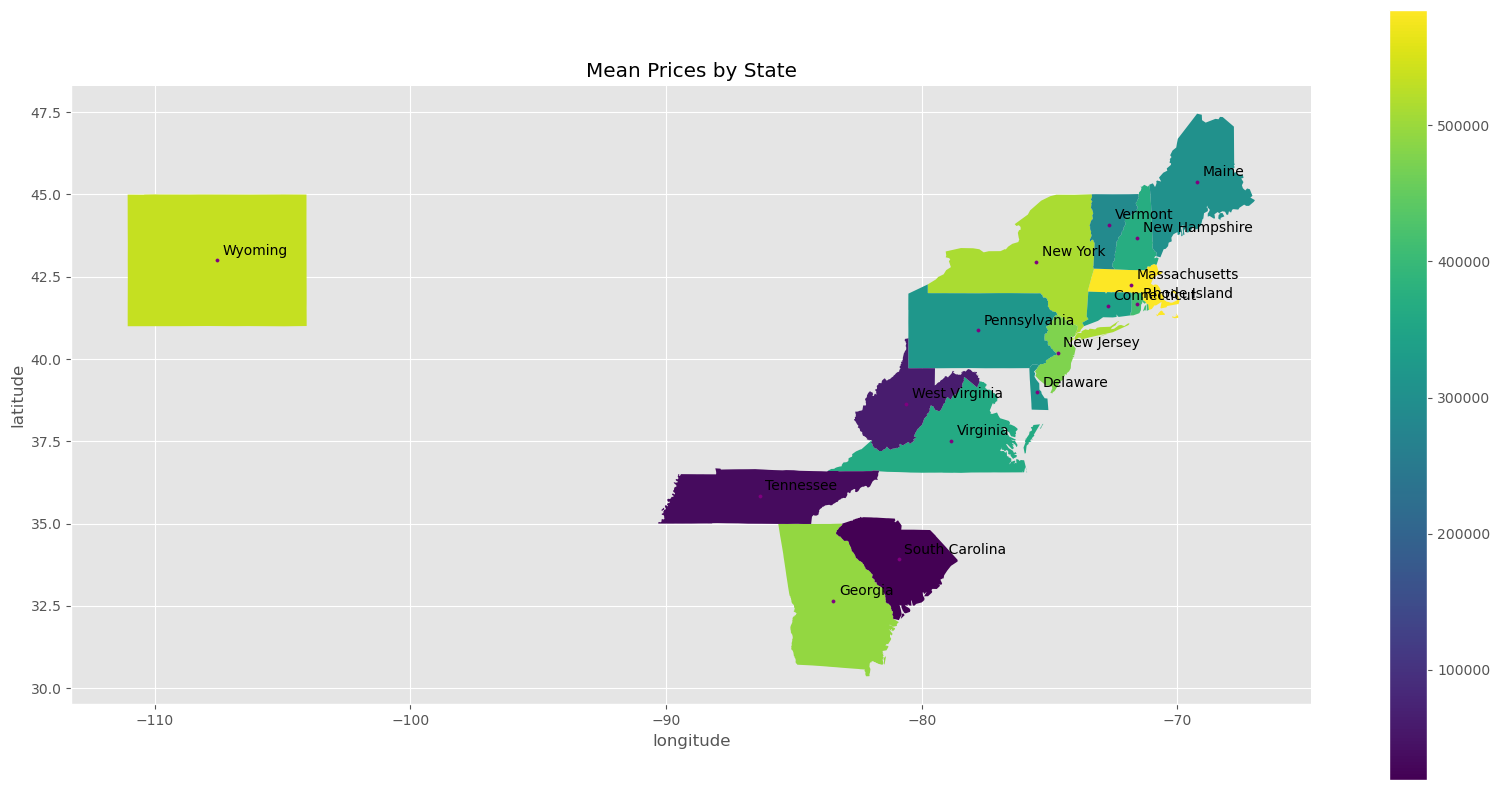

In [ ]:
import geopandas as gpd

fig, gax = plt.subplots(figsize=(20,10))
# Create a second DataFrame with geometric data from US Census Bureau
df_states = gpd.read_file('/Users/hanhhieudao/Downloads/states_21basic/states.shp')

# Merge the two DataFrames based on the 'state_name' column
merged_df = pd.merge(df_states, grouped_by_state, left_on='STATE_NAME', right_on='state_name', how='right')
merged_df = merged_df.dropna(subset=['price_mean'])

# Plot the merged DataFrame
merged_df.plot(ax=gax, column='price_mean', legend=True, cmap='viridis')
merged_df['geometry'] = merged_df['geometry'].centroid

# Plot the state centroids as purple dots
merged_df.plot(ax=gax, color='purple', markersize=5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
plt.title('Mean Prices by State')

for x, y, label in zip(merged_df['geometry'].x, merged_df['geometry'].y, merged_df['state_name']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

The map visualization distinctly portrays Massachusetts and New York with notably high housing prices, indicating strong real estate markets likely driven by urban demand, economic activity, and social demographics. In contrast, West Virginia emerges as a region with comparatively lower housing prices, potentially reflecting a distinct economic landscape and lower demand dynamics within the state's housing market. Since the dataset lacks a large number of states on the West Coast, data might be insufficient to understand thoroughly the US housing market. California, for example, is a large states with outstanding entertainment activities and economic status, is missing from this data and might not contribute a comprehensive view to the analysis. 

## Social Demographics

In [ ]:
file_path = '/Users/hanhhieudao/Desktop/ECO225/DECENNIALDP2020.DP1-Data.csv'
df_population = pd.read_csv(file_path, skiprows=[1])
df_population.head()

,GEO_ID,NAME,DP1_0001C,DP1_0002C,DP1_0003C,DP1_0004C,DP1_0005C,DP1_0006C,DP1_0007C,DP1_0008C,...,DP1_0152P,DP1_0153P,DP1_0154P,DP1_0155P,DP1_0156P,DP1_0157P,DP1_0158P,DP1_0159P,DP1_0160P,Unnamed: 322
0,0400000US01,Alabama,5024279,286529,302637,325031,338475,345931,314244,311116,...,1.0,0.5,2.5,4.6,(X),(X),100.0,67.7,32.3,NaN
1,0400000US02,Alaska,733391,48104,51054,51344,47433,49456,55058,56981,...,1.0,0.4,9.1,3.6,(X),(X),100.0,63.9,36.1,NaN
2,0400000US04,Arizona,7151502,392370,443878,485297,485891,477713,473578,462909,...,1.0,0.4,5.9,1.7,(X),(X),100.0,65.3,34.7,NaN
3,0400000US05,Arkansas,3011524,179575,192794,205837,204915,198109,188836,190366,...,1.1,0.7,2.4,4.3,(X),(X),100.0,65.0,35.0,NaN
4,0400000US06,California,39538223,2137439,2393219,2613891,2644071,2731553,2915258,2911574,...,0.5,0.2,2.1,1.3,(X),(X),100.0,54.5,45.5,NaN


In [ ]:
population = df_population[['NAME', 'DP1_0001C', 'DP1_0025C', 'DP1_0049C', 'DP1_0086C', 'DP1_0087C', 'DP1_0089C', 'DP1_0090C']]
merged = pd.merge(population, grouped_by_state, left_on='NAME', right_on='state_name', how='inner')
merged = merged.rename(columns={'DP1_0001C': 'total_population'})
merged= merged.rename(columns={'DP1_0025C': 'male'})
merged = merged.rename(columns={'DP1_0049C': 'female'})
merged = merged.rename(columns={'DP1_0086C': 'White'})
merged = merged.rename(columns={'DP1_0087C': 'Black/African'})
merged = merged.rename(columns={'DP1_0089C': 'Asian'})
merged = merged.rename(columns={'DP1_0090C': 'Hawaiian'})
merged.dropna()
merged.head()

,NAME,total_population,male,female,White,Black/African,Asian,Hawaiian,price_mean,price_median,acre_lot_mean,acre_lot_std,bed_median,bath_median,house_size_median,state_name
0,Connecticut,3605944,1749853,1856091,2692022,467416,205693,5971,350565.63,284000.0,0.65,250160.64,3.0,2.0,1586.0,Connecticut
1,Delaware,989948,476719,513229,665198,244944,50969,1547,317346.44,279900.0,0.20,193430.65,3.0,2.0,1750.0,Delaware
2,Georgia,10711908,5188570,5523338,6212741,3538146,565644,19020,492703.60,490225.0,0.91,74803.07,5.0,3.5,3388.5,Georgia
3,Maine,1362359,667560,694799,1299963,36304,25473,1619,308005.53,225000.0,0.88,280282.97,3.0,2.0,1560.0,Maine
4,Massachusetts,7029917,3401702,3628215,5399122,669866,582484,10436,604714.07,550000.0,0.51,360118.88,3.0,2.0,1568.0,Massachusetts


## The Main Message

The plot compares the average housing prices for different racial groups based on their population sizes in 13 states collected from the dataset of US Real Estate Market. It reveals the trends in housing prices concerning population sizes, with regression lines highlighting the correlation with White, Black/African, and Asian groups.

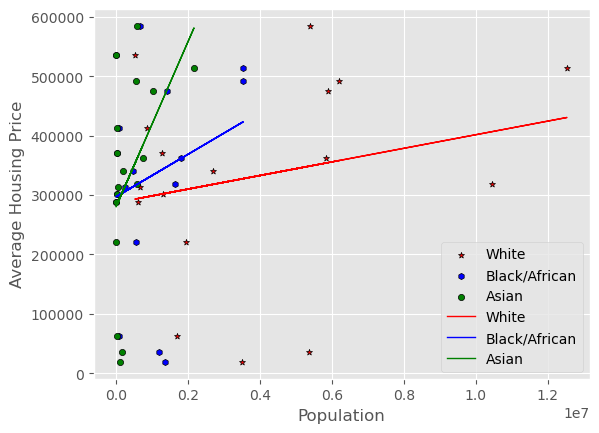

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()
x3 = merged['White']
y3 = merged['price_mean']
x4 = merged['Black/African']
y4 = merged['price_mean']
x5 = merged['Hawaiian']
y5 = merged['price_mean']
x6 = merged['Asian']
y6 = merged['price_mean']

# Scatter plots
ax.scatter(x3, y3, c="red", marker="*", edgecolors='black', s=20, label='White')
ax.scatter(x4, y4, c="blue", marker="h", edgecolors='black', s=20, label='Black/African')
ax.scatter(x6, y6, c="green", marker="o", edgecolors='black', s=20, label='Asian')

#Regression lines
m3, b3 = np.polyfit(x3, y3, 1)
plt.plot(x3, m3*x3+b3, color='red', linewidth=1, label='White')
m4, b4 = np.polyfit(x4, y4, 1)
plt.plot(x4, m4*x4+b4, color='blue', linewidth=1, label='Black/African')
m6, b6 = np.polyfit(x6, y6, 1)
plt.plot(x6, m6*x6+b6, color='green', linewidth=1, label='Asian')

ax.set_xlabel("Population")
ax.set_ylabel("Average Housing Price")

ax.legend()
plt.show()


From the plotted regression lines, the Asian community exhibits the steepest slope, indicating a highest correlation of population size with housing prices. This finding suggests further exploration into the potential social factors contributing to the impact of Asian group on the US Real Estate Market. Some possible determinants include household income and employment rate can bright meaningful insights of their purchasing power and its effect on US property demand and prices.

Following the Asian population, the Black/African group displays a moderately steep slope, indicative of a positive correlation with housing prices. Conversely, the regression line for the White population demonstrates a gradual slope, suggesting a comparatively weaker correlation between White population size and housing prices.

 Notably, despite the lower population size of the Asian community in most states compared to the White population, the housing prices associated with Asian group are marked higher. This observation indicates a deeper study on the disproportionate impact of Asian demographic on the US real estate market. 

In [ ]:
# Grouping the data by state and calculating the mean and standard deviation of price and acre_lot
grouped_by_city = df.groupby(['city']).agg(
    price_mean=('price', 'mean'),
    price_median=('price', 'median'),
    acre_lot_mean=('acre_lot', 'mean'),
    acre_lot_std=('price', 'std'),
    bed_median=('bed', 'median'), 
    bath_median=('bath', 'median'), 
    house_size_median=('house_size', 'median')
)
grouped_by_city['city_name'] = grouped_by_city.index
grouped_by_city = grouped_by_city.round(2)
# Presenting the result in descending order
grouped_by_city = grouped_by_city.sort_values(by='price_mean', ascending=False)
grouped_by_city.head()

,price_mean,price_median,acre_lot_mean,acre_lot_std,bed_median,bath_median,house_size_median,city_name
city,,,,,,,,
Waterfront,12000000.00,12000000.0,NaN,0.00,4.0,7.0,7230.0,Waterfront
Rochdale Village,9800000.00,9800000.0,2.50,0.00,7.0,8.0,15000.0,Rochdale Village
Middletown Township,9199999.50,9199999.5,0.09,9092195.00,5.0,6.0,NaN,Middletown Township
Waccabuc,8864814.81,5950000.0,31.16,3784198.29,4.0,7.0,7725.0,Waccabuc
Woods Hole,8583000.00,2600000.0,1.81,9710174.57,5.0,4.0,3803.0,Woods Hole


In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = "https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

pol_tables = soup.find_all("table", {"class": "wikitable"})
data = []
for table in pol_tables:
    for row in table.find_all("tr")[1:]:
        columns = row.find_all(["th", "td"])
        pol_data = [column.text.strip() for column in columns]
        data.append(pol_data)
pol_columns = ['City', 'ST', '2022', '2020', 'Change', 'mi^2', 'km^2', 'mi', 'km','location' ]
pol_df = pd.DataFrame(data, columns=pol_columns)
pol_df = pol_df[~pol_df.apply(lambda row: row.astype(str).str.contains('None').any(), axis=1)]
pol_df['City'] = pol_df['City'].str.replace(r'\[.*\]', '', regex=True)
pol_df.reset_index(drop=True, inplace=True)
pol_df.head(2)

,City,ST,2022,2020,Change,mi^2,km^2,mi,km,location
0,New York,NY,"8,335,897","8,804,190",−5.32%,300.5,778.3,"29,298","11,312",40°40′N 73°56′W﻿ / ﻿40.66°N 73.94°W﻿ / 40.66; ...
1,Los Angeles,CA,"3,822,238","3,898,747",−1.96%,469.5,"1,216.0","8,304","3,206",34°01′N 118°25′W﻿ / ﻿34.02°N 118.41°W﻿ / 34.02...


## Project Three

### Part Two

(1) How do the economy and housing market have a strong correlation?
The state of the economy plays a pivotal role in determining the price of a house. Economic health is measured by indicators such as GDP, employment rates,inflation rates, and many other variables. The dynamics of the US housing market, as reflected by 2 key metrics: Median Listing Price (MLP), which represents Supply, and the Median Sale Price (MSP), which reflects Demand, are significantly impacted by real GDP and CPI (Vaidynathan et al., 2023). In addition, the impact of economic indicators varies across different types of real estate, thus impacts on market value of a house in different ways (Sagalyn, 1990). Understanding price fluctuations in houses requires an analysis in not only macroeconomic indicators across states and US territories but also the specifiy property features. 

(2) Data sources and HTML-based web-scraping technique
The economic indicators are obtained by HTML-based web-scarping method. This technique is very useful because it can extract real-time data from websites and provides up-to-date infromation. Besides, it allows users to access a large amount of data from various fields that are a rich sources for analysis and inisghts. The selected variables are Real GDP growth rate (2021-2022), Nominal GDP (2022-2023), CPI, and household income. 
Source of data: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP (Wikipedia) 

(3) Data merging and how it is helful for the reqsearch question
Merging datasets containing economic indicators would help to make analyses comprehensive and uncover uncover underlying patterns in housing prices. Moreover, incorporating demographic data and regional factors into analyses also signals future changes in housing market conditions. 

Below is step-by-step process of web-scraping to gather data, merge external variables, and visualize them in analytical plots. 



* Step 1: Import necessary libraries for HTML scraping. 

In [19]:
import pandas as pd
from bs4 import BeautifulSoup

* Step 2: Store the URL of the page used for scraping. Here, the page is from Wikipedia. Then parse the HTML content using BeautifulSoup package and find all the tables with the class 'wikitable' on the page. 

In [21]:
import requests

url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table", {"class": "wikitable"})

* Step 3: Iterate through each table and each row to extract data from each cell. 

In [22]:
data = []
for table in tables[:2]:
    for row in table.find_all("tr")[1:]:
        columns = row.find_all(["th", "td"])
        state_income = [column.text.strip() for column in columns]
        data.append(state_income)

* Step 4: Create a new data frame named 'incomedf' for the extracted data and specify column names.

In [23]:
columns = ["State Rank", "State", "2021",'2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', 'Average Annual Growth Rate']
incomedf = pd.DataFrame(data, columns=columns)
incomedf.head()

,State Rank,State,2021,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,Average Annual Growth Rate
0,,United States,"$69,717","$65,712","$63,179","$60,336","$57,617","$55,775","$53,657","$52,250","$51,371","$50,502","$50,046",3.07%
1,–,"Washington, D.C.","$90,088","$92,266","$85,203","$82,372","$75,506","$75,628","$71,648","$67,572","$66,583","$63,124","$60,903",3.68%
2,1,Maryland,"$90,203","$86,738","$83,242","$80,776","$78,945","$75,847","$73,971","$72,483","$71,122","$70,004","$68,854",2.49%
3,2,Massachusetts,"$89,645","$85,843","$79,835","$77,385","$75,297","$70,628","$69,160","$66,768","$65,339","$62,859","$62,072",3.41%
4,3,New Jersey,"$89,296","$85,751","$81,740","$80,088","$76,126","$72,222","$71,919","$70,165","$69,667","$67,458","$67,681",2.57%


In [24]:
# Remove dollar sign and convert to float for all columns except 'State' and 'Average Annual Growth Rate'
for col in incomedf.columns[2:]: 
    incomedf[col] = incomedf[col].str.replace('$', '')

# Only keep the states contained in original dataset
states = df['state'].unique()
incomedf_filtered = incomedf[incomedf['State'].isin(states)]

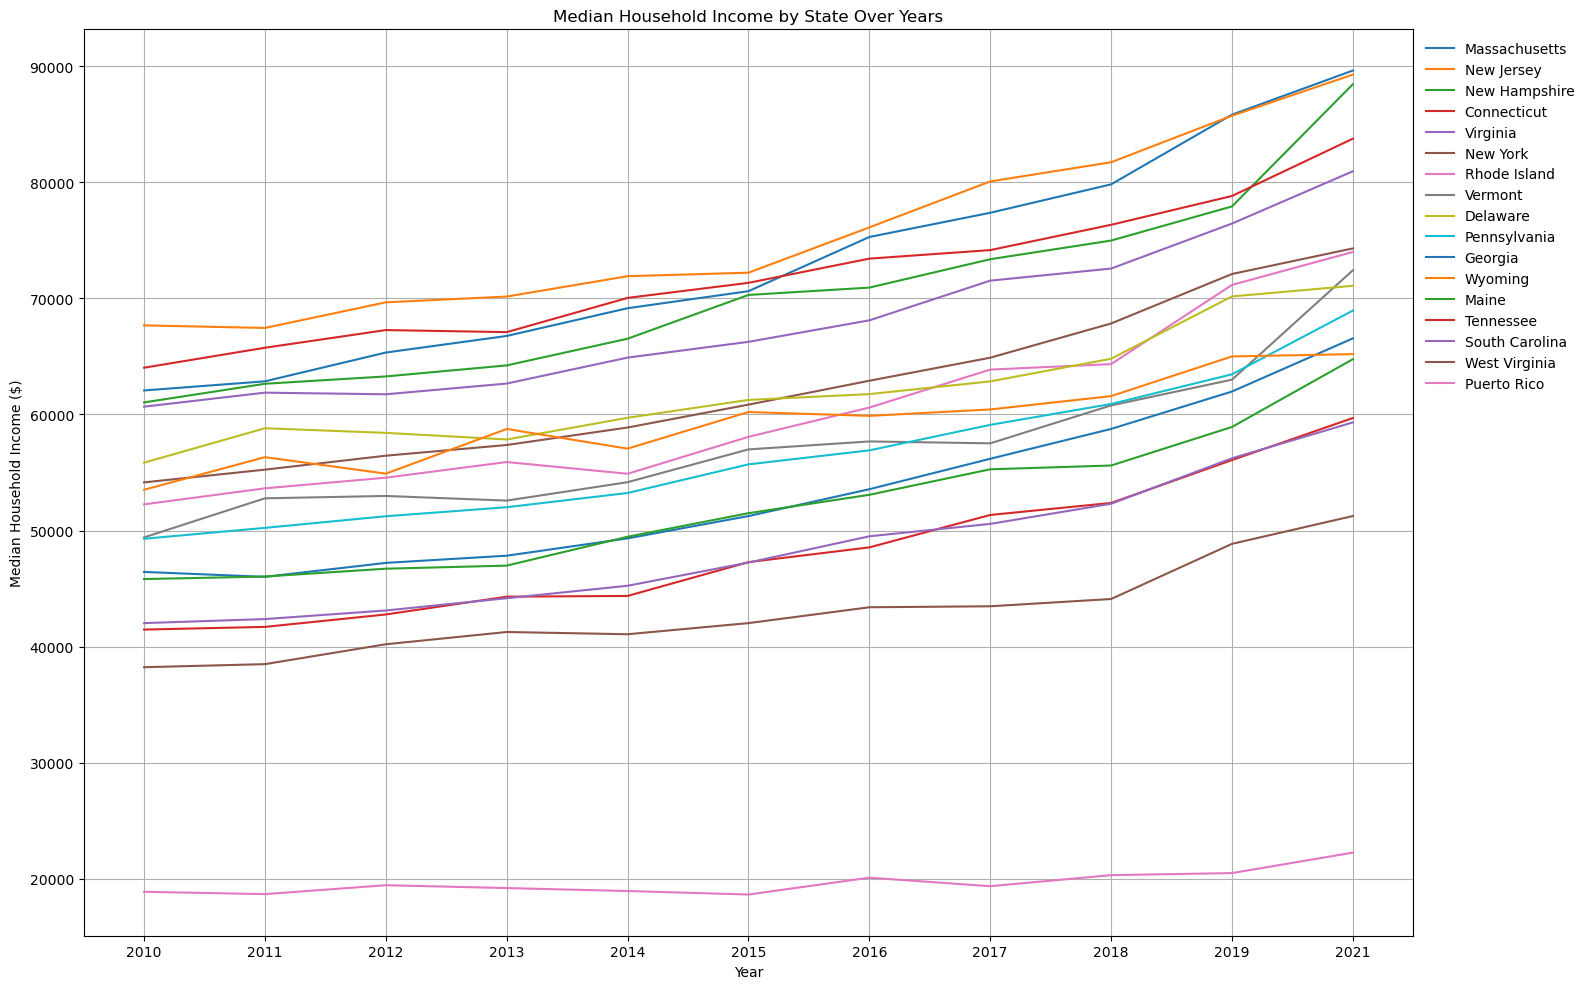

In [25]:
plt.figure(figsize=(16, 10))

# Extracting the years for the x-axis
years = incomedf.columns[2:-1][::-1] 

# Plotting each state's income over the years
for index, row in incomedf_filtered.iterrows():
    state_name = row['State']
    income_values = row[years].str.replace(',', '').astype(float)  # Remove commas and convert to float
    plt.plot(years, income_values, label=state_name)

plt.title("Median Household Income by State Over Years")
plt.xlabel("Year")
plt.ylabel("Median Household Income ($)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()


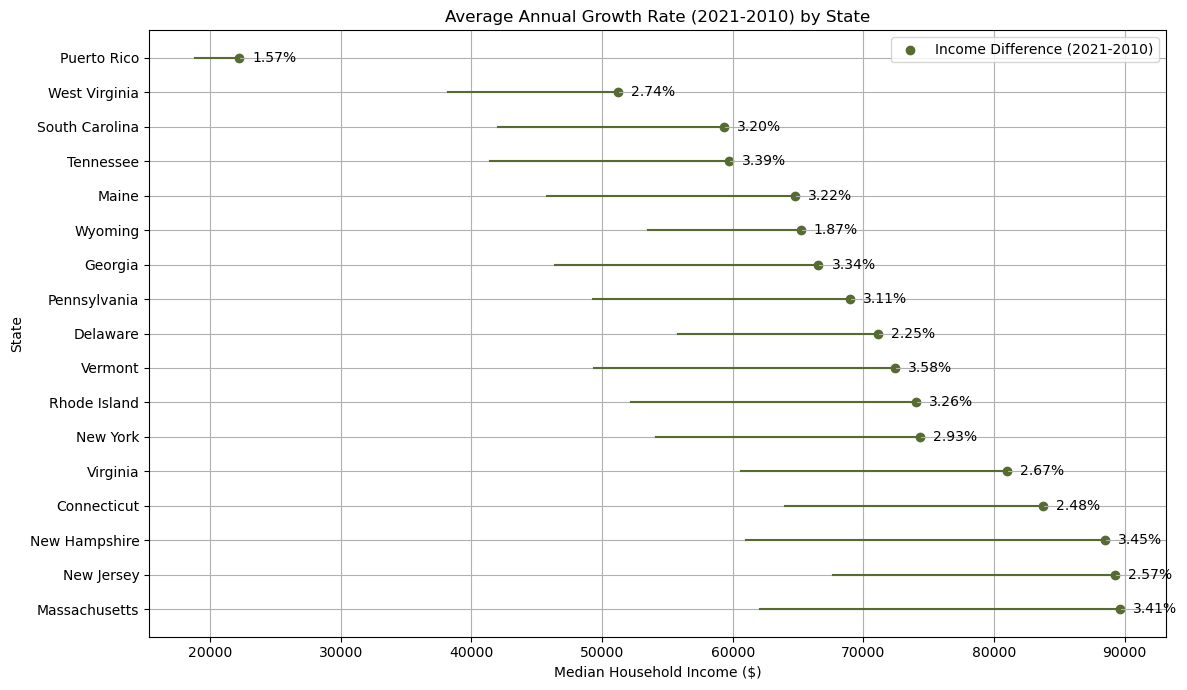

In [26]:
# Make a copy of the dataframe to avoid chained indexing
incomedf_filtered = incomedf_filtered.copy()
incomedf_filtered['2021'] = incomedf_filtered['2021'].str.replace('$', '').str.replace(',', '').astype(float)
incomedf_filtered['2010'] = incomedf_filtered['2010'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate difference between income of 2021 and 2010
incomedf_filtered['Income_Diff'] = incomedf_filtered['2021'] - incomedf_filtered['2010']

# Create horizontal dumbbell plot
plt.figure(figsize=(12, 7))

# Plotting the difference
plt.scatter(incomedf_filtered['2021'], incomedf_filtered['State'], color='darkolivegreen', label='Income Difference (2021-2010)')
for i, state in enumerate(incomedf_filtered['State']):
    plt.plot([incomedf_filtered['2021'].iloc[i], incomedf_filtered['2021'].iloc[i] - incomedf_filtered['Income_Diff'].iloc[i]], [state, state], color='darkolivegreen')

for i, state in enumerate(incomedf_filtered['State']):
    plt.text(incomedf_filtered['2021'].iloc[i] + 1000, state, f"{incomedf_filtered['Average Annual Growth Rate'].iloc[i]}", verticalalignment='center')

plt.xlabel('Median Household Income ($)')
plt.ylabel('State')
plt.title('Average Annual Growth Rate (2021-2010) by State')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
merged_dff = pd.merge(grouped_by_state, incomedf, left_on='state_name', right_on='State', how='left')
merged_dff.head()

,price_mean,price_median,acre_lot_mean,acre_lot_std,bed_median,bath_median,house_size_median,state_name,State Rank,State,...,2018,2017,2016,2015,2014,2013,2012,2011,2010,Average Annual Growth Rate
0,698321.75,649000.0,0.29,391281.80,2.0,2.0,1164.0,New York,14,New York,...,"67,844","64,894","62,909","60,850","58,878","57,369","56,448","55,246","54,148",2.93%
1,604714.07,550000.0,0.51,360118.88,3.0,2.0,1568.0,Massachusetts,2,Massachusetts,...,"79,835","77,385","75,297","70,628","69,160","66,768","65,339","62,859","62,072",3.41%
2,535000.00,535000.0,0.29,0.00,3.0,3.0,1935.0,Wyoming,31,Wyoming,...,"61,584","60,434","59,882","60,214","57,055","58,752","54,901","56,322","53,512",1.87%
3,495908.94,435000.0,0.31,295281.00,3.0,2.0,1572.0,New Jersey,3,New Jersey,...,"81,740","80,088","76,126","72,222","71,919","70,165","69,667","67,458","67,681",2.57%
4,492703.60,490225.0,0.91,74803.07,5.0,3.5,3388.5,Georgia,25,Georgia,...,"58,756","56,183","53,559","51,244","49,321","47,829","47,209","46,007","46,430",3.34%


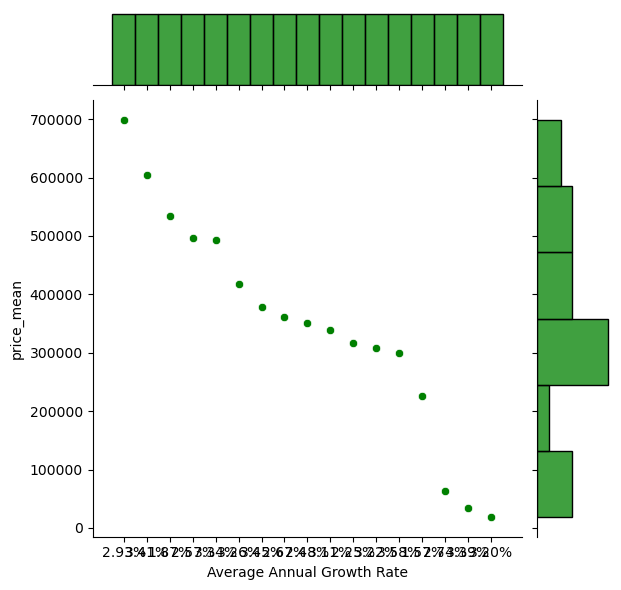

In [31]:
import seaborn as sns

#Contour Plot
sns.jointplot(x = merged_dff['Average Annual Growth Rate'], y = merged_dff['price_mean'], data= merged_dff, color="green")

### Part Three

"Location, location, location" remains a well-known phrase in the real estate circles. Accoding to a literature review by Wardrip (2011), public transit has a considerable influence on housing costs. The benefits of residing near a transit stop are valued among young adults with stable income who prioritize high living standards. But not all neighborhoods are impacted the same way by transit networks, especially the areas have already high housing prices and their residents are from middle class. Though, Giuliano and Agarwal (2010) found that people moving to a new area often look at the transportation aspect and expect it to be easyly accessible. 

The following dataset is from the National Neighborhood Data Archive (NaNDA) and provides data on public transit stops by census tract in the United States for the years 2016-2018. (https://www.openicpsr.org/openicpsr/project/111109/version/V1/view)

In [ ]:
dtype_spec = {'tract_fips': 'string'}
stops_df = pd.read_csv('/Users/hanhhieudao/Desktop/ECO225/nanda_transit_tract_2016-2018_05P.csv', dtype=dtype_spec)
stops_df.head()

,tract_fips,census_tract_area,count_ntm_stops,tot_pop_2010,stops_per_capita,stops_per_sqmile
0,01001020100,3.788,0,1812.0,0.0,0.0
1,01001020200,1.290,0,2218.0,0.0,0.0
2,01001020300,2.065,0,3155.0,0.0,0.0
3,01001020400,2.464,0,4337.0,0.0,0.0
4,01001020500,4.401,0,10498.0,0.0,0.0


In [ ]:
fips_code = pd.read_csv('/Users/hanhhieudao/Desktop/ECO225/US_FIPS_Codes.csv', dtype='string')
fips_code['State_County_Code'] = fips_code['FIPS State'] + fips_code['FIPS County']

stops_df['county_code'] = stops_df['tract_fips'].astype(str).str[:5]
stops_df['county'] = stops_df['county_code'].map(dict(zip(fips_code['State_County_Code'], fips_code['County Name'])))
stops_df['state_code'] = stops_df['tract_fips'].astype(str).str[:2]
stops_df['state_name'] = stops_df['state_code'].map(dict(zip(fips_code['FIPS State'], fips_code['State'])))

# Print the frame with names of counties and states
stops_df.head()


,tract_fips,census_tract_area,count_ntm_stops,tot_pop_2010,stops_per_capita,stops_per_sqmile,county_code,county,state_code,state_name
0,01001020100,3.788,0,1812.0,0.0,0.0,01001,Autauga,01,Alabama
1,01001020200,1.290,0,2218.0,0.0,0.0,01001,Autauga,01,Alabama
2,01001020300,2.065,0,3155.0,0.0,0.0,01001,Autauga,01,Alabama
3,01001020400,2.464,0,4337.0,0.0,0.0,01001,Autauga,01,Alabama
4,01001020500,4.401,0,10498.0,0.0,0.0,01001,Autauga,01,Alabama


In [ ]:
# Grouping the data by state and calculating the mean for stops_per_capita and stops_per_sqmile
avg_stops = stops_df.groupby('state_name')[['stops_per_capita', 'stops_per_sqmile']].mean().reset_index()
merged = pd.merge(avg_stops, grouped_by_state[['state_name', 'price_mean']], left_on='state_name', right_on='state_name', how='left')
merged.drop(columns=['state_name'], inplace=True)
avg_stops['housing-price'] = merged['price_mean']
avg_stops.dropna(subset=['housing-price'], inplace=True)
avg_stops


,state_name,stops_per_capita,stops_per_sqmile,housing-price
6,Connecticut,3.344178,15.808874,591962.52
7,Delaware,3.128145,13.284118,345206.59
10,Georgia,1.424575,4.961646,492703.60
19,Maine,0.128878,0.390300,420010.05
21,Massachusetts,7.053142,22.465388,975750.52
29,New Hampshire,0.475422,1.496406,480767.87
30,New Jersey,2.159833,17.900625,626210.43
32,New York,3.497654,25.056206,1490667.61
38,Pennsylvania,9.410512,18.795124,424374.16
39,Rhode Island,0.061521,0.093613,500215.49


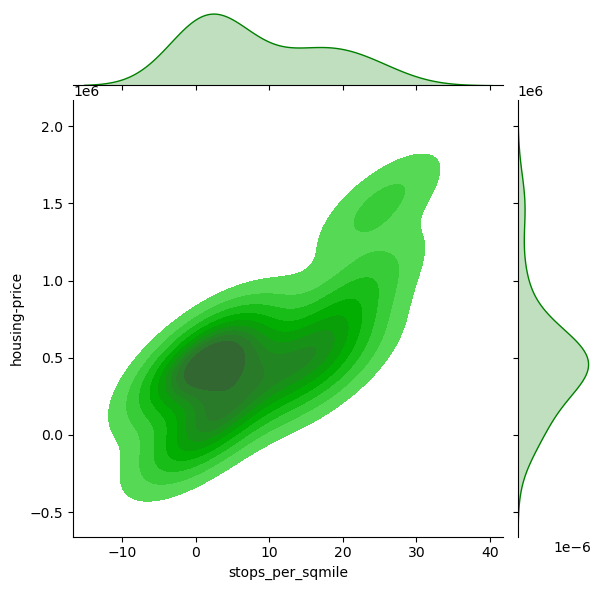

In [ ]:
import seaborn as sns

#Contour Plot
sns.jointplot(x = avg_stops['stops_per_sqmile'], y = avg_stops['housing-price'], kind='kde', color="green", fill='True')

The above Contour plot utilizes a color gradient to represent the strength of correlation. TThe dark green regions indicate a higher correlation, particularly in areas where there are 0-10 transit stops. This observation emphasizes the impact of public transit accessibility on property values, considering that a propery will be more desirable if it's convenient for house owners to commute to various destinations. A well-developed transit network does increase the housing prices. 

In [ ]:
# import folium

# def price_to_color(price):
#     if price < 200000:
#         return 'green'
#     elif 200000 <= price < 500000:
#         return 'yellow'
#     elif 500000 <= price < 1000000:
#         return 'orange'
#     else:
#         return 'red'

# NYC_COORD = [40.7128, -74.0059]
# states_of_interest = ['New York', 'Massachusetts', 'Virgin Islands']
# top3_df = df_map[df_map['state'].isin(states_of_interest)]

# top3_map = folium.Map(location=NYC_COORD, zoom_start=12, 
# tiles='cartodbpositron', width=640, height=480)
# # Plot coordinates
# top3_df.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], 
#                                               radius=0.001,
#                                               color=price_to_color(row["price"]))
#                                              .add_to(top3_map), axis=1)

# top3_map

# Conclusion
The analysis highlights three main factors affecting the housing prices in the US Real Estate Market: house features, economic conditions, and proximity to transportation networks. 

First, the paper found that with houses with more amentities, such as additional bedrooms, bathrooms, and larger living spaces, tend to have higher prices. However, it's essential to note that prices can vary due to different buyer preferences, living demands, and personal income.

Secondly, demographic composition associated with neighborhoods and areas do affect the housing prices. With data scraped from web, the plots suggest that higher household incomes often feature more luxury homes. This implies that the demand for certain types of houses varies among different socioeconomic groups and personal income is a key determinant to differentiate buyer groups. 

Lastly, the location of a property, especially the number of transit stops in the area, significantly impacts its value. Properties located in areas with better access to transportation tend to command higher prices, indicating that residents consider commuting benefits when deciding to purchase a house; thus, driving up prperty prices.

For furtue questions, a comprehensive economic model is crucial to understand these patterns in prices fully as there are many other variables affecting housing costs. In addition, because of the dynamics in variables' behaviours, there is a necessity for optimized metrics that incorporate all relevant factors influencing the housing market into appropriate economic models. 

## References

- Oluseyi, J.O. (2014). Critical factors determining Rental Value of Residential Property in Ibadan Metropolis, Nigeria. Property Management, 32(3), 224-240.
- Zietz, J., Zietz, E., & Sirmans, G. (2008). Determinants of House Prices: A Quantile Regression Approach. The Journal of Real Estate Finance and Economics, 37, 317-333. doi:10.1007/s11146-007-9053-7.
- Gallin, J. (2008). The long-run relationship between house prices and rents. Real Estate Economics, 36(4):635–658.
- Islam, S. (2007). Neighbourhood Characteristics and Adjacent Ravines on House Prices. Journal of Real Estate AEconomics. 
- Bayer, P., Casey, M., Ferreira, F., & McMillan, R. (Year). Racial and ethnic price differentials in the housing market. Journal Name, Volume= (Issue), PageRange.
- U.S. Census Bureau. (2020). 2020 Census Demographic Profile. U.S. Census Bureau.https://www.census.gov/data/tables/2023/dec/2020-census-demographic-profile.html 
- Realtor.com. (2024). Real Estate Listings in the US by State and Zip Code. Kaggle. 
